In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
iris=sns.load_dataset('iris')

In [4]:
titan=sns.load_dataset('titanic')

In [5]:
tips=sns.load_dataset('tips')

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
titan

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## sns.bar

<BarContainer object of 3 artists>

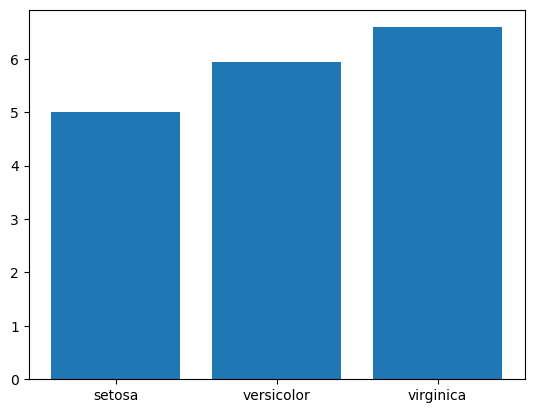

In [11]:
#各类鸢尾花speal——lenth平均大小
sepal_length_mean=iris.groupby('species')['sepal_length'].mean()
sepal_length_mean
plt.bar(x=sepal_length_mean.index,height=sepal_length_mean.values)

In [12]:
sepal_length_mean

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

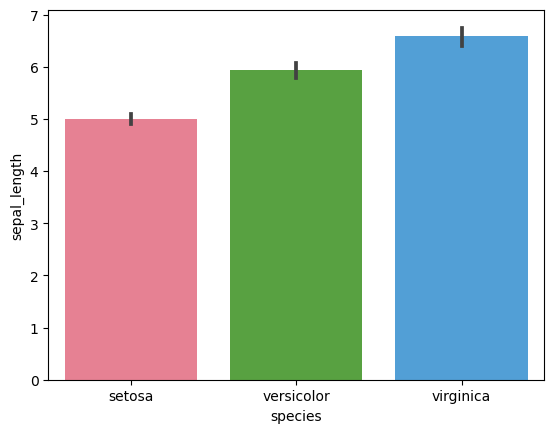

In [15]:
sns.barplot(x='species',y='sepal_length',data=iris,estimator=np.mean,
            palette='husl')

In [16]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
temp_data=tips.groupby(['sex','smoker'])['total_bill'].mean()

In [18]:
temp_data

sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

In [22]:
for i in temp_data.index:
    print(i)

('Male', 'Yes')
('Male', 'No')
('Female', 'Yes')
('Female', 'No')


In [23]:
for i in temp_data.index:
    print('-'.join(i))

Male-Yes
Male-No
Female-Yes
Female-No


<BarContainer object of 4 artists>

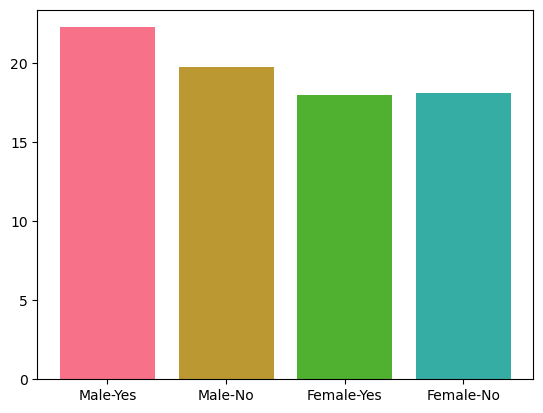

In [25]:
plt.bar(x=temp_data.index.map(),height=temp_data.values,
        color=sns.color_palette('husl'))

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

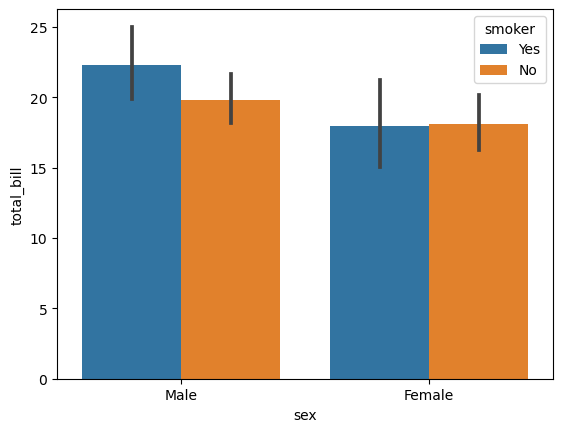

In [28]:
#hue分组因子，在xy上分组，hue指定谁对谁分组
#hue只解决二此分组
sns.barplot(x='sex',y='total_bill',data=tips,hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

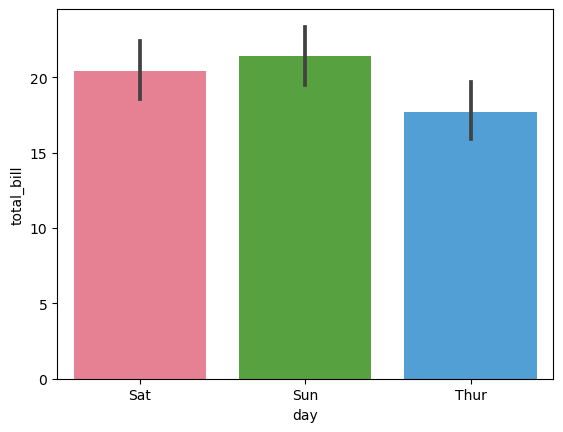

In [33]:
#order 对x或者y的离散字段，进行排序或者选择order中的内容必须与数据中的一致
sns.barplot(x='day',y='total_bill',data=tips,palette='husl',order=['Sat','Sun','Thur'])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

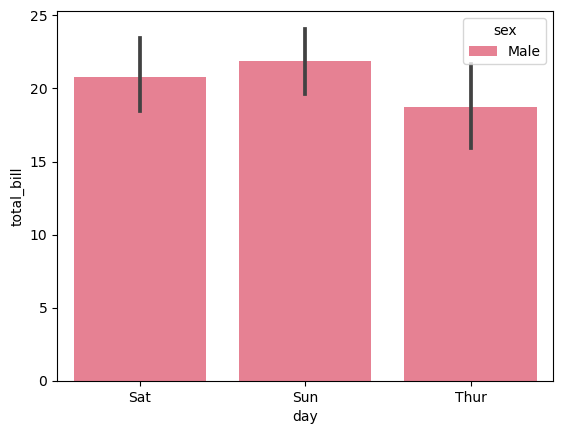

In [38]:
#hue_order对hue的字段的数据进行排序和选择
sns.barplot(x='day',y='total_bill',data=tips,palette='husl',order=['Sat','Sun','Thur'],
            hue='sex',hue_order=['Male'])

### 计数条形图

<AxesSubplot:xlabel='sex', ylabel='count'>

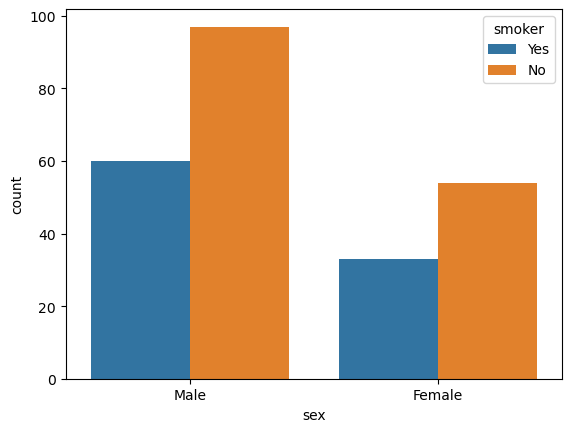

In [41]:
sns.countplot(x='sex',data=tips,hue='smoker')

### 散点图

In [42]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Text(0, 0.5, 'sepal')

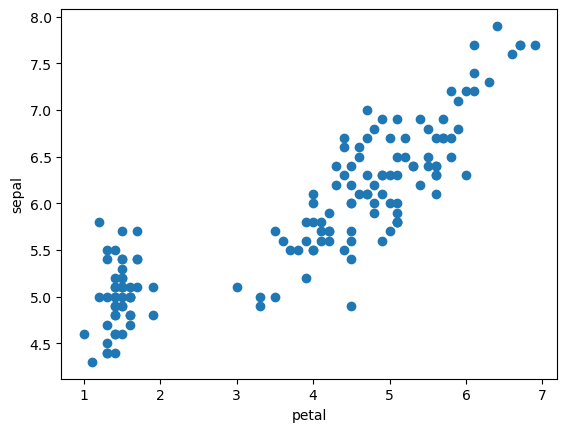

In [44]:
plt.scatter(x=iris.petal_length,y=iris.sepal_length)
plt.xlabel('petal')
plt.ylabel('sepal')

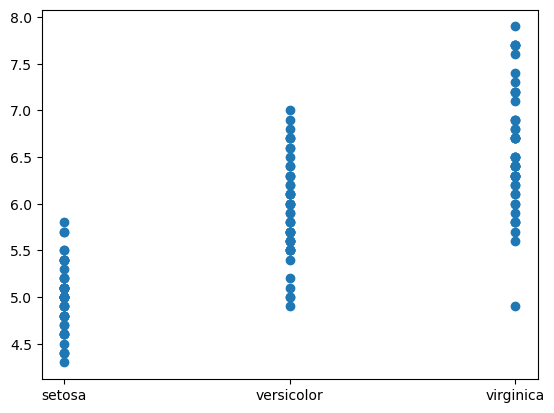

In [45]:
# matplotlib标准的scatter，是用来展示连续字段和连续字段的对应关系
# 如果是连续字段和连续字段之间，是不容易展示相对关系的
# 想查看一种变量的分布状态使用箱线图或者直方图

plt.scatter(x=iris.species,y=iris.sepal_length)

In [46]:
#找到setosa这一类的length
iris.loc[iris.species=='setosa','sepal_length']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

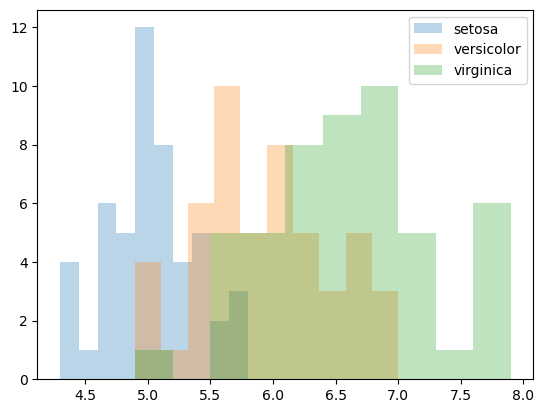

In [54]:
#离散字段和连续字段
for categoray in iris.species.unique():
    plt.hist(iris.loc[iris.species==categoray,'sepal_length'],alpha=0.3,label=categoray)
plt.legend()

In [55]:
#散点图仅展示连续字段和连续字段之间的关系
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

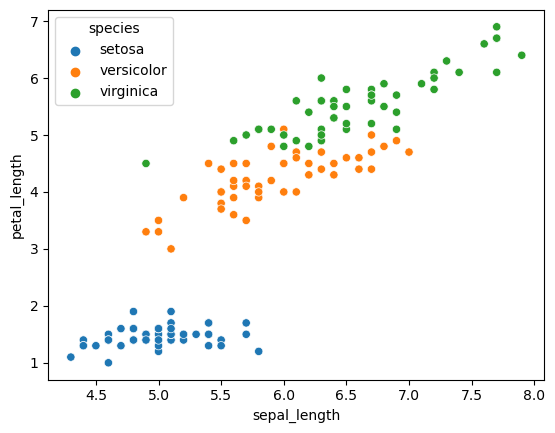

In [57]:
#size用某列数据控制元的大小  
sns.scatterplot(x='sepal_length',y='petal_length',data=iris,hue='species')